<a href="https://colab.research.google.com/github/moore-austin/AcceleratedLearning/blob/main/Convert_Folium_Map_to_PNG_Without_SELENIUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convert Folium Map to PNG without SELENIUM

I developed this partial* solution after challenging myself by only coding via Iphone/Ipad w/ Google Colab.

You cannot run SELENIUM on Iphone/Ipad, and I wanted to be able to automatically generate a PNG image of a folium map within Colab. The only methods that I could find made SELENIUM a requirement. 

A few links to these solutions are below:


*   https://stackoverflow.com/questions/53565979/export-a-folium-map-as-a-png
*   https://github.com/python-visualization/folium/issues/35

It's an awkward work around and requires a conversion from HTML to PDF to PNG, with the most cumbersome portion being the ability to grab a high_quality image during the PDF-PNG conversion.

This code could definitely be improved, yet this solution works well enough for my needs, which is to automatically generate an automatic Memory Palace that users can select for an location-based notes application that I'm working on.

*Partial because I would like the quality  of the image to be higher. 

### Installs & Libraries Needed

In [5]:
# To generate the map
import folium
from PIL import Image

# Needed To Convert HTML to PDF
!pip install pdfkit
!sudo apt-get install wkhtmltopdf
import pdfkit

# Needed to Convert PDF to PNG/JPEG
# Needed to Convert PDF to PNG/JPEG
#!pip install fitz # Possibly not needed, code below worked after implementation
!pip install PyMuPDF # Needed for fitz, yet did not allow fitz import to work
import fitz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.5-1build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### The Map Conversion Function

In [8]:
def convert_map_png(folium_map, file_name):
  mapName = file_name
  
  # Get HTML File of Map
  folium_map.save(mapName + '.html')
  htmlfile = mapName + '.html'

  # Convert Map from HTML to PDF, Delay to Allow Rendering
  options = {'javascript-delay': 500,
    'page-size': 'Letter',
    'margin-top': '0.0in',
    'margin-right': '0.0in',
    'margin-bottom': '0.0in',
    'margin-left': '0.0in',
    'encoding': "UTF-8",
    'custom-header': [
        ('Accept-Encoding', 'gzip')
    ]}
  pdfkit.from_file(htmlfile,  (mapName + '.pdf'), options=options)
  pdffile = mapName + '.pdf'

  # Convert Map from PDF to PNG
  doc = fitz.open(pdffile)
  page = doc.load_page(0)
  pix = page.get_pixmap()
  output = mapName + '.png'
  pix.save(output)
  pngfile = mapName + '.png'
  doc.close()

  # Crop Out Map Image
  pilImage = Image.open(pngfile)
  
  croppedImage = pilImage.crop((0,0,287,287)) # Adjust this if your map renders differently on PDF

  return croppedImage

## Testing & Example

#### Generate The Map

In [3]:
center_point = (39.9254255, -105.0152344) # I use this location as my personal Memory Palace

map = folium.Map(location = (center_point),height = 500, width = 500,zoom_start = 15, 
                  zoom_control=True, scrollWheelZoom=True,
                  dragging=True, no_touch=False, )
tile = folium.TileLayer( 
      tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
      attr = 'Esri',
      name = 'Esri Satellite',
      overlay = False,
      control = True
    ).add_to(map)
map


#### Convert the Map to PNG

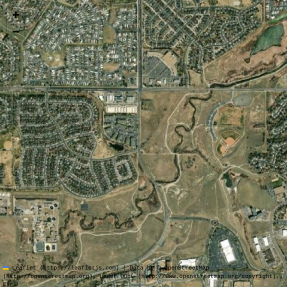

In [9]:
map_png = convert_map_png(map, 'this_map')
map_png